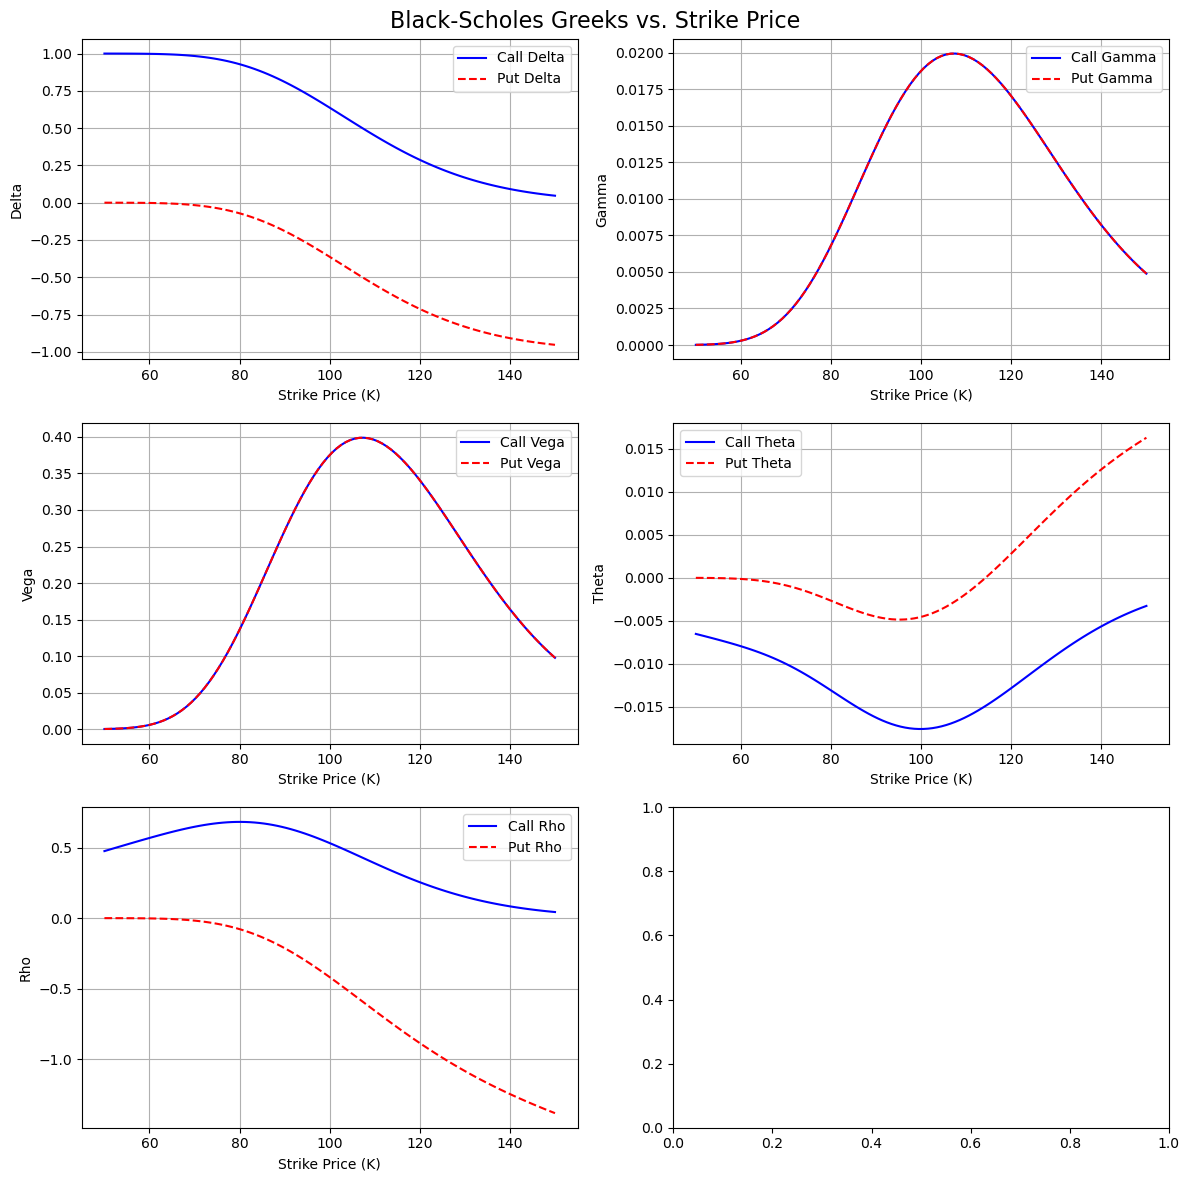

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from quant_options_mm.pricing.black_scholes import black_scholes_greeks

# Fixed parameters
S = 100   # Current stock price
T = 1.0   # Time to expiration (in years)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

# Range of strike prices
strike_prices = np.linspace(50, 150, 100)

# Store Greeks for calls and puts
greeks_call = {"Delta": [], "Gamma": [], "Vega": [], "Theta": [], "Rho": []}
greeks_put = {"Delta": [], "Gamma": [], "Vega": [], "Theta": [], "Rho": []}

# Compute Greeks for different strike prices
for K in strike_prices:
    call_greeks = black_scholes_greeks(S, K, T, r, sigma, option_type="call")
    put_greeks = black_scholes_greeks(S, K, T, r, sigma, option_type="put")

    for key in greeks_call.keys():
        greeks_call[key].append(call_greeks[key])
        greeks_put[key].append(put_greeks[key])

# Plot Greeks
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Black-Scholes Greeks vs. Strike Price", fontsize=16)

greek_names = ["Delta", "Gamma", "Vega", "Theta", "Rho"]
for i, greek in enumerate(greek_names):
    ax = axes[i // 2, i % 2]
    ax.plot(strike_prices, greeks_call[greek], label=f"Call {greek}", linestyle="-", color="blue")
    ax.plot(strike_prices, greeks_put[greek], label=f"Put {greek}", linestyle="--", color="red")
    ax.set_xlabel("Strike Price (K)")
    ax.set_ylabel(greek)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
